Exibir os Top 5 aplicativos por número de instalações.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

In [2]:
dados = pd.read_csv('../data/processed/googleplaystore_cleaned.csv')

Exibir os Top 5 aplicativos por número de instalações

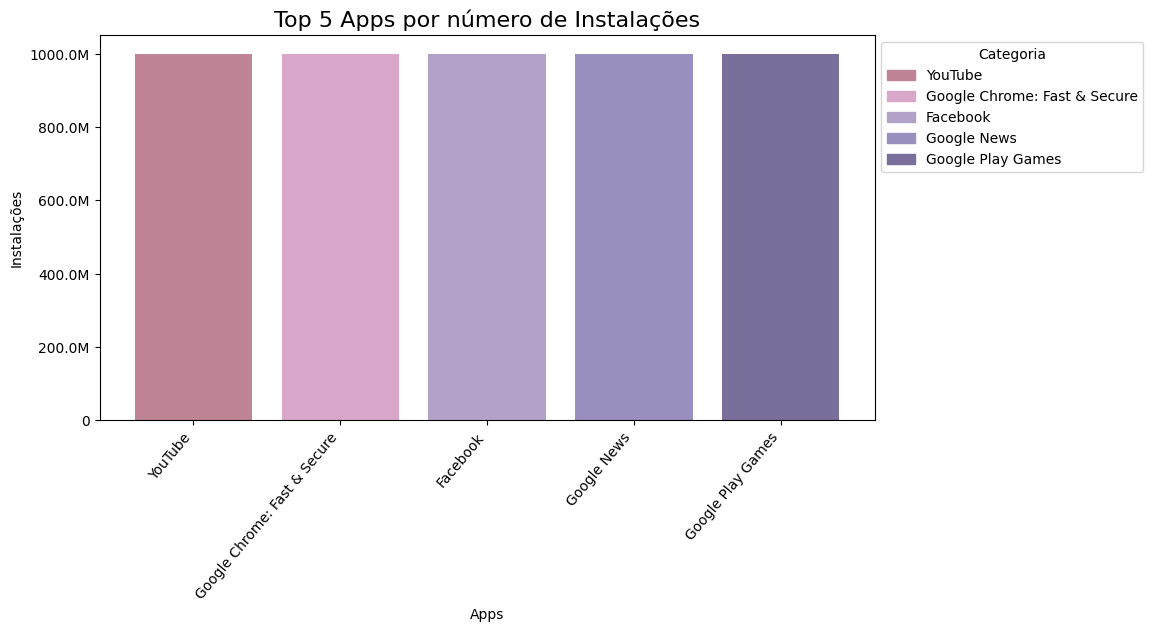

In [29]:
# Selecionar os Top 5 aplicativos por número de instalações
top_5_apps = dados.sort_values('Installs', ascending=False).head(5)

# Categorias únicas nos Top 5
categorias = top_5_apps['App'].unique()

# Criar um dicionário de cores para cada categoria
palette = [
    "#C08497",  # rosa queimado
    "#D8A7CA",  # lilás claro
    "#B3A2C7",  # roxo suave acinzentado
    "#9A8FBF",  # lilás acinzentado mais forte
    "#7A6F9B",  # roxo acinzentado mais escuro
    "#6E6A86",  # cinza arroxeado
    "#A6979C",  # rosé acinzentado
    "#4A4453",  # roxo quase preto
    "#BFBFBF",  # cinza claro
    "#000000"   # preto
]
colors = palette[:len(categorias)]  # 10 cores do colormap
color_map = {cat: colors[i] for i, cat in enumerate(categorias)}

# Lista de cores para o gráfico
bar_colors = top_5_apps['App'].map(color_map)

plt.figure(figsize=(10,5))
plt.title('Top 5 Apps por número de Instalações', fontsize=16)

plt.bar(top_5_apps['App'], top_5_apps['Installs'], color=bar_colors)

plt.xlabel('Apps')
plt.ylabel('Instalações')
plt.xticks(rotation=50, ha='right')

# Formatar valores do eixo y
def formatar_numero(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.1f}K'
    return int(x)

formatter = FuncFormatter(formatar_numero)

plt.gca().yaxis.set_major_formatter(formatter)

# Legenda das cores
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in categorias]
plt.legend(handles, categorias, title='Categoria', loc='upper left', bbox_to_anchor=(1,1))

# Salvando a imagem
plt.savefig("../outputs/top_5_apps_instalacoes", dpi=300, bbox_inches='tight')

plt.show()

Mostar o app mais caro existente no dataset

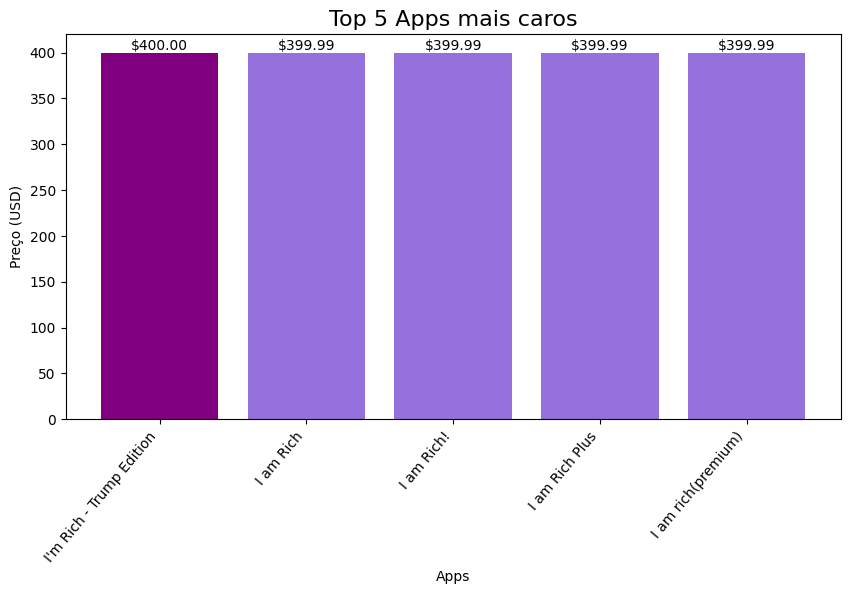

In [30]:
# Selecionar os Top 5 aplicativos mais caros
top_5_precos = dados.sort_values('Price', ascending=False).head(5)

# Categorias únicas nos Top 5
categorias = top_5_precos['App'].unique()

#Identificar o app mais caro
app_mais_caro = top_5_precos.iloc[0]['App']

bar_colors = ['purple' if app == app_mais_caro else 'mediumpurple' for app in top_5_precos['App']]

plt.figure(figsize=(10,5))
plt.title('Top 5 Apps mais caros', fontsize=16)

bars = plt.bar(top_5_precos['App'], top_5_precos['Price'], color=bar_colors)

plt.xlabel('Apps')
plt.ylabel('Preço (USD)')
plt.xticks(rotation=50, ha='right')

# Formatar eixo y para não usar notação científica
plt.ticklabel_format(style='plain', axis='y')

# Incluindo preço acima da barra
for bar, price in zip(bars, top_5_precos['Price']):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posição X
        bar.get_height(),                 # posição Y (topo da barra)
        f'${price:.2f}',                  # texto formatado
        ha='center', va='bottom', fontsize=10
    )

# Salvando a imagem
plt.savefig("../outputs/top_5_apps_preco", dpi=300, bbox_inches='tight')

plt.show()

Identificar quantos apps são classificados como "Mature 17+"

Foi necessário agrupar as categorias para melhor exibição

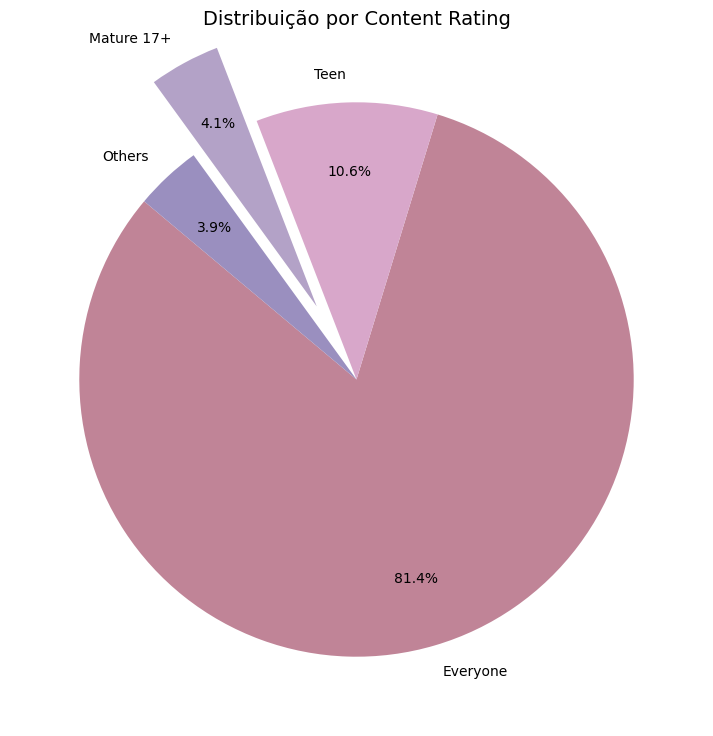

In [51]:
count_dados = dados['Content Rating'].value_counts()

# Criar um dicionário de cores para cada categoria
palette = [
    "#C08497",  # rosa queimado
    "#D8A7CA",  # lilás claro
    "#B3A2C7",  # roxo suave acinzentado
    "#9A8FBF",  # lilás acinzentado mais forte
    "#7A6F9B",  # roxo acinzentado mais escuro
    "#6E6A86",  # cinza arroxeado
    "#A6979C",  # rosé acinzentado
    "#4A4453",  # roxo quase preto
    "#BFBFBF",  # cinza claro
    "#000000"   # preto
]

colors = palette[:len(count_dados)]

#Agrupar as menores categorias em Others
smallest_two = count_dados.nsmallest(3)

# Soma e cria a categoria Others
content_counts_grouped = count_dados.drop(smallest_two.index)
content_counts_grouped['Others'] = smallest_two.sum()

#Destacar apenas a fatia Mature 17+
explode = [0.3 if label == "Mature 17+" else 0 for label in content_counts_grouped.index]

# Função para formatar as porcentagens para aparecerem dentro das fatias
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

plt.figure(figsize=(9,9))
plt.title('Distribuição por Content Rating', fontsize=14)

plt.pie(
    content_counts_grouped,
    labels=content_counts_grouped.index,
    autopct=autopct_format,
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    pctdistance=0.75 
)

# Salvando a imagem
plt.savefig("../outputs/distribuicao_contentRating", dpi=300, bbox_inches='tight')

plt.show()


Exibir o Top 10 apps por número de reviews, em ordem decrescente.

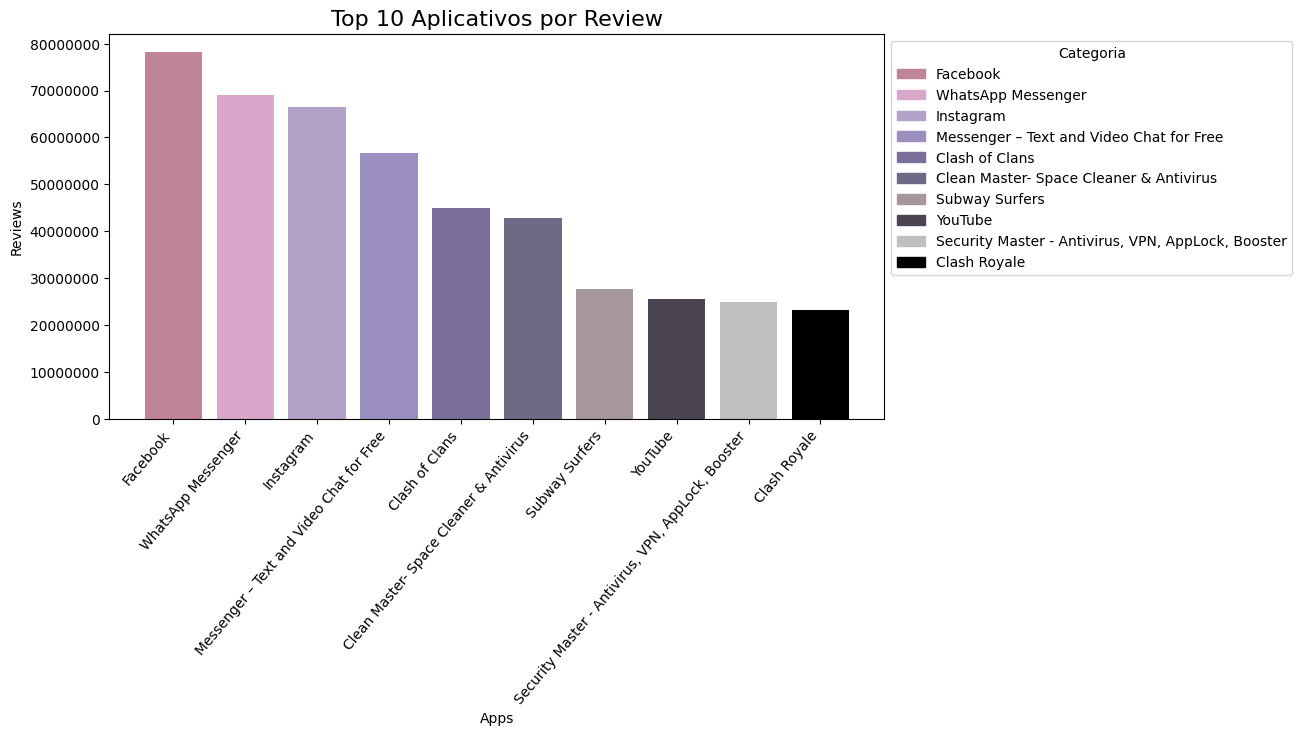

In [63]:
top_10_reviews = dados.sort_values('Reviews', ascending=False).drop_duplicates(subset=['App']).head(10)

# Categorias únicas nos Top 5
categorias = top_10_reviews['App']

# Criar um dicionário de cores para cada categoria
palette = [
    "#C08497",  # rosa queimado
    "#D8A7CA",  # lilás claro
    "#B3A2C7",  # roxo suave acinzentado
    "#9A8FBF",  # lilás acinzentado mais forte
    "#7A6F9B",  # roxo acinzentado mais escuro
    "#6E6A86",  # cinza arroxeado
    "#A6979C",  # rosé acinzentado
    "#4A4453",  # roxo quase preto
    "#BFBFBF",  # cinza claro
    "#000000"   # preto
]
colors = palette[:len(categorias)]  # 10 cores do colormap
color_map = {cat: colors[i] for i, cat in enumerate(categorias)}

# Lista de cores para o gráfico
bar_colors = top_10_reviews['App'].map(color_map)

plt.figure(figsize=(10,5))
plt.title('Top 10 Aplicativos por Review', fontsize=16)

plt.bar(top_10_reviews['App'], top_10_reviews['Reviews'], color=bar_colors)

plt.xlabel('Apps')
plt.ylabel('Reviews')
plt.xticks(rotation=50, ha='right')

# Formatar eixo y para não usar notação científica
plt.ticklabel_format(style='plain', axis='y')

# Legenda das cores
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in categorias]
plt.legend(handles, categorias, title='Categoria', loc='upper left', bbox_to_anchor=(1,1))

# Salvando a imagem
plt.savefig("../outputs/top_10_apps_review", dpi=300, bbox_inches='tight')

plt.show()


Criar um grafico de pizza para as categorias mais frequentes

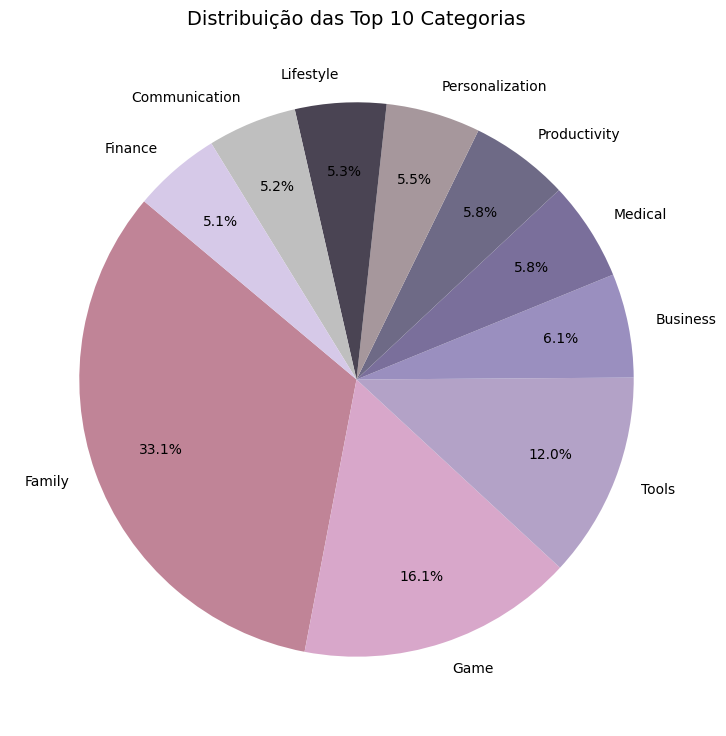

In [13]:
top_categorias = dados['Category'].value_counts().head(10)

# Criar um dicionário de cores para cada categoria
palette = [
    "#C08497",  # rosa queimado
    "#D8A7CA",  # lilás claro
    "#B3A2C7",  # roxo suave acinzentado
    "#9A8FBF",  # lilás acinzentado mais forte
    "#7A6F9B",  # roxo acinzentado mais escuro
    "#6E6A86",  # cinza arroxeado
    "#A6979C",  # rosé acinzentado
    "#4A4453",  # roxo quase preto
    "#BFBFBF",  # cinza claro
    "#D6C9E8"   # lavanda acinzentado
]

# Função para formatar as porcentagens para aparecerem dentro das fatias
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

plt.figure(figsize=(9,9))
plt.title('Distribuição das Top 10 Categorias', fontsize=14)
plt.pie(
    top_categorias,
    labels=top_categorias.index,
    autopct=autopct_format,
    startangle=140,
    colors=palette[:len(top_categorias)],
    pctdistance=0.75 
)

# Salvando a imagem
plt.savefig("../outputs/distribuicao_contentRating", dpi=300, bbox_inches='tight')

plt.show()

Porcentagem de apps pagos e gratuitos